In [47]:
from planet4 import region_data

In [48]:
from pathlib import Path
root = Path('/Users/klay6683/data/planet4/season23_catalog/')

In [49]:
fnotches = pd.read_csv(root / 'ESP_011351_0945_fnotches.csv')

In [50]:
fnotches = fnotches.drop('Unnamed: 0', axis=1)

In [52]:
from planet4 import markings

In [54]:
def get_marking(line, cut=0.8):
    data = []
    for marking in ['fan_','blotch_']:
        m = line[line.index.str.startswith(marking)]
        data.append(m.rename_axis(lambda x: x[x.index('_')+1:]))
    fnotch = markings.Fnotch(line.fnotch_value, data[0], data[1])
    return fnotch.get_marking(cut)

In [56]:
get_marking(fnotches.iloc[0], 0.5)

In [99]:
def get_final_markings_counts(img_name, cut=0.5):
    d = {}
    d['image_name'] = img_name
    blotch_fname = root / '{}_blotches.csv'.format(img_name)
    d['n_blotches'] = len(pd.read_csv(blotch_fname))
    fan_fname = root / '{}_fans.csv'.format(img_name)
    d['n_fans'] = len(pd.read_csv(fan_fname))
    
    fnotch_fname = root / '{}_fnotches.csv'.format(img_name)
    df = pd.read_csv(fnotch_fname, index_col=0)
    for row in df.iterrows():
        marking = get_marking(row[1])
        if isinstance(marking, markings.Blotch):
            d['n_blotches'] +=1
        else:
            d['n_fans'] += 1
    return d

In [97]:
get_final_markings_counts('ESP_011351_0945')

before fnotching: {'n_fans': 1934, 'n_blotches': 1217, 'image_name': 'ESP_011351_0945'}
after fnotching {'n_fans': 2089, 'n_blotches': 1782, 'image_name': 'ESP_011351_0945'}


{'image_name': 'ESP_011351_0945', 'n_blotches': 1782, 'n_fans': 2089}

In [135]:
results = []
from IPython.display import display
from ipywidgets import IntProgress
t = IntProgress(min=0, max=len(region_data.Inca.season3)-1)
display(t)
for i, img_name in enumerate(region_data.Inca.season3):
    t.value = i
    results.append(get_final_markings_counts(img_name))

In [136]:
results = pd.DataFrame(results).sort_values(by='image_name')

In [131]:
%matplotlib inline

In [137]:
metadata = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/P4_10-18-15_H_lat_lng.csv")

In [138]:
metadata.set_index('HiRISE_image', inplace=True)

In [139]:
results.set_index('image_name', inplace=True)

In [140]:
results = results.join(metadata.solar_longitude)

In [141]:
results.set_index('solar_longitude', inplace=True)

In [142]:
results['both'] = results.n_blotches + results.n_fans

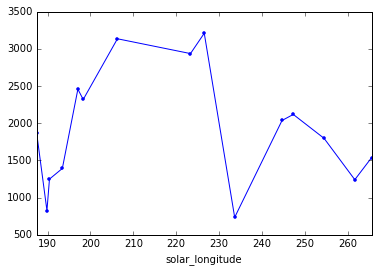

In [134]:
results.both.plot(style='.-')

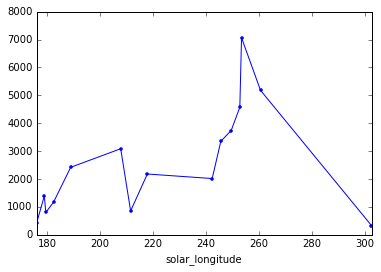

In [147]:
results.both.plot(style='.-')

In [151]:
metadata.columns

Index(['lat_centered', 'lng_east', 'binning', 'Object_time', 'solar_longitude',
       'mars_time', 'north_azimuth', 'incidence_angle', 'sub_solar_azimuth',
       'phase_angle', 'emission_angle', 'line_pixel_scale',
       'sample_pixel_scale', 'pixel_resolution', 'mean_ground_resolution'],
      dtype='object')

In [152]:
metadata.head()

,lat_centered,lng_east,binning,Object_time,solar_longitude,mars_time,north_azimuth,incidence_angle,sub_solar_azimuth,phase_angle,emission_angle,line_pixel_scale,sample_pixel_scale,pixel_resolution,mean_ground_resolution
HiRISE_image,,,,,,,,,,,,,,,
ESP_011296_0975,-82.197,225.253,4,2008-12-23T16:15:26.861,178.833,17.1368,110.5220,88.7496,33.9692,88.6680,0.126506,0.993333,0.993333,0.993333,0.993297
ESP_011341_0980,-81.797,76.130,2,2008-12-27T04:25:02.363,180.809,17.1053,110.3550,87.7622,34.8539,87.9902,0.244628,0.493991,0.493991,0.493991,0.494061
ESP_011348_0950,-85.043,259.094,4,2008-12-27T17:29:17.706,181.117,18.0259,123.6460,89.5608,33.8052,89.6876,0.155690,0.993521,0.993521,0.993521,0.993234
ESP_011350_0945,-85.216,181.415,2,2008-12-27T21:14:01.135,181.205,16.4914,99.7306,87.6506,37.3171,108.1210,24.588300,0.539108,0.539108,0.539108,0.539336
ESP_011351_0945,-85.216,181.548,4,2008-12-27T23:05:54.685,181.249,18.3165,127.9650,89.8666,33.8784,86.4021,4.123800,0.989757,0.989757,0.989757,0.990483
